Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

In [134]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'


# Module Project: Regression I

During the guided project, we predicted how much it would cost to buy a condo in Tribecca. For the module project, your goal will be similar: predict how much it costs to rent an apartment in New York City.

Dataset source: [renthop.com](https://www.renthop.com/).

## Directions

> Do Not Copy-Paste. You must *type* each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.
>
> — Zed Shaw, [Learn Python the Hard Way](https://learnpythonthehardway.org/)

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using wrangle function.
- **Task 2:** Conduct exploratory data analysis (EDA) and plot the relationship between one feature and the target `'price'`.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Establish the baseline mean absolute error for your dataset.
- **Task 5:** Build and train a `Linearregression` model.
- **Task 6:** Check the mean absolute error of our model on the training data.
- **Task 7:** Extract and print the intercept and coefficient from your `LinearRegression` model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

## I. Wrangle Data

In [135]:
from sklearn.metrics import mean_absolute_error as mae
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [136]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    
    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Use the above `wrangle` function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [137]:
df = wrangle(filepath)

**Task 2:** Use your `pandas` and dataviz skills to explore the dataset. As part of this process, make a scatter plot that shows the relationship between one of the numerical features in the dataset and the target `'price'`.

**Remember:** You should plot your feature on the `X` axis and your target on the `y` axis.

In [138]:

#access the dataframe and apply a mask that is == 'low' and set it equal to one
#access the dataframe and apply a mask that is == 'medium' and set it equal to two
#access the dataframe and apply a mask that is == 'high' and set it equal to three


#create a function with a single parameter
#if the parameter is equal to low return 1
#if the parameter is equal to medium return 2
#if the parameter is equal to high return 3
#else return 0 because its a value that we were not expecting


#method using loc
df.loc[df['interest_level'] == 'low', 'interest_level'] = 1
df.loc[df['interest_level'] == 'medium', 'interest_level'] = 2
df.loc[df['interest_level'] == 'high', 'interest_level'] = 3

#method using masks
df['interest_level' == 'low'] = 1
df['interest_level' == 'medium'] = 2
df['interest_level' == 'high'] = 3
#apply the function to the dataframe column youre interested in modifying

#method using functions
def interest_lvl_to_num(string):
    if string == 'low':
        return 1
    elif string == 'medium':
        return 2
    elif string == 'high':
        return 3
    #return 0 in the event that string is null.
    return 0


df['interest_level'] = df['interest_level'].apply(interest_lvl_to_num)


In [139]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,False
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,0,...,0,0,0,0,0,0,0,0,0,3
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,0,...,0,0,0,0,0,0,0,0,0,3
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,0,...,0,0,0,0,0,0,0,0,0,3
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,0,...,0,0,0,0,0,0,0,0,0,3
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,0,...,0,0,0,0,0,0,0,0,0,3


In [140]:
# prints int columns with more than 2 unique values
for col in df.columns:
    if (df[col].dtype == ('int64' or 'float64')) and (df[col].nunique() > 2):
        print(df[col].value_counts())


1    15651
2    14569
0     9317
3     7188
4     1825
5      221
6       43
8        2
7        1
Name: bedrooms, dtype: int64
2500     1106
3200      879
3000      837
2700      776
2400      772
         ... 
10225       1
4186        1
2219        1
5835        1
10650       1
Name: price, Length: 2685, dtype: int64


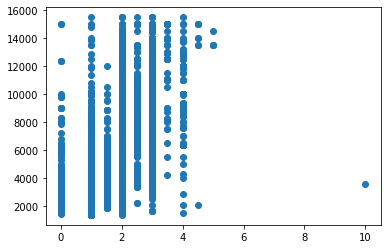

In [141]:
plt.scatter(df['bathrooms'], df['price'])

#  II. Split Data

**Task 3:** Choose one feature from the dataset and assign it to your feature matrix `X`. Then assign the column `'price'` to the target vector `y`.

**Remember:** Your feature matrix needs to be two-dimensional, but your feature matrix must be one-dimensional.

In [142]:
X = df[['bathrooms']]
y = df['price']

# III. Establish Baseline

**Task 4:** Since this is a **regression** problem, you need to calculate the baseline the mean absolute error for your model. First, calculate the mean of `y`. Next, create a list `y_pred` that has the same length as `y` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [143]:
y_pred = [y.mean()] * len(df)
baseline_mae = mae(y, y_pred)
print('Baseline MAE:', baseline_mae)


Baseline MAE: 1201.532252154329


# IV. Build Model

**Task 5:** Build and train a `LinearRegression` model named `model` using your feature matrix `X` and your target vector `y`.

In [144]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression as lr

# Step 2: Instantiate predictor
model = lr()

# Step 3: Fit predictor on the (training) data
model.fit(X,y)

LinearRegression()

# V. Check Metrics

**Task 6:** How does your model perform in comparison to your baseline? Calculate the mean absolute error for your model's predictions.

In [145]:
training_mae = mae(y, model.predict(X))

print('Training MAE:', training_mae)


Training MAE: 889.763187741364


# VI. Communicate Results 

You've just created a linear model. That means that your model makes predictions using an equation that looks like $\texttt{apt price} = \texttt{intercept}~+~\texttt{coefficient}~\times~\texttt{your feature}$. But what are the values of the intercept and coefficient that your model is using? 

**Task 7:** Print out the intercept and coefficient associated with `model`.

In [146]:
print(model.intercept_)
print(model.coef_)


486.9330801932765
[2573.36198309]
